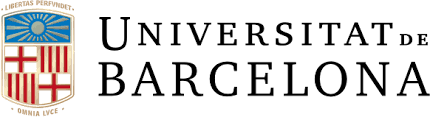

##*Master en Big Data & Data Science*

### **TFM: Clasificación de enfermedades en imágenes médicas utilizando técnicas de Deep Learning**
---

**Alumnos:**
* Santiago Rico Bartolome
* Claudia Alcazar Ureña
* Andres Villa
* Steve Solano Bermudez

**Profesor Tutor:** Ferran Arroyo Vendrell

# Preparacion del Entorno

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.svm import SVC
from google.colab import drive
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, learning_curve,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report

In [ ]:
# Conectar a la unidad de google drive para acceder a los directorios de entrenamiento y prueba
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Directorios en google drive
train_dir = '/content/drive/MyDrive/Training'
test_dir = '/content/drive/MyDrive/Testing'

# Directorios en google drive de subcarpetas
meningioma_dir = '/content/drive/MyDrive/Training/meningioma'

In [ ]:
# Propiedades de las imagenes a usar
batch_size = 32
img_height = 100
img_width = 100

# Preparacion de los Datos

In [ ]:
# Creacion del set de entrenamiento
ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode='categorical') # Utilizar 'categorical' para obtener las etiquetas como one-hot encoding

Found 5712 files belonging to 4 classes.


In [ ]:
# Imprimimos las etiquetas
class_names = ds.class_names
print(class_names)

['glioma', 'meningioma', 'notumor', 'pituitary']


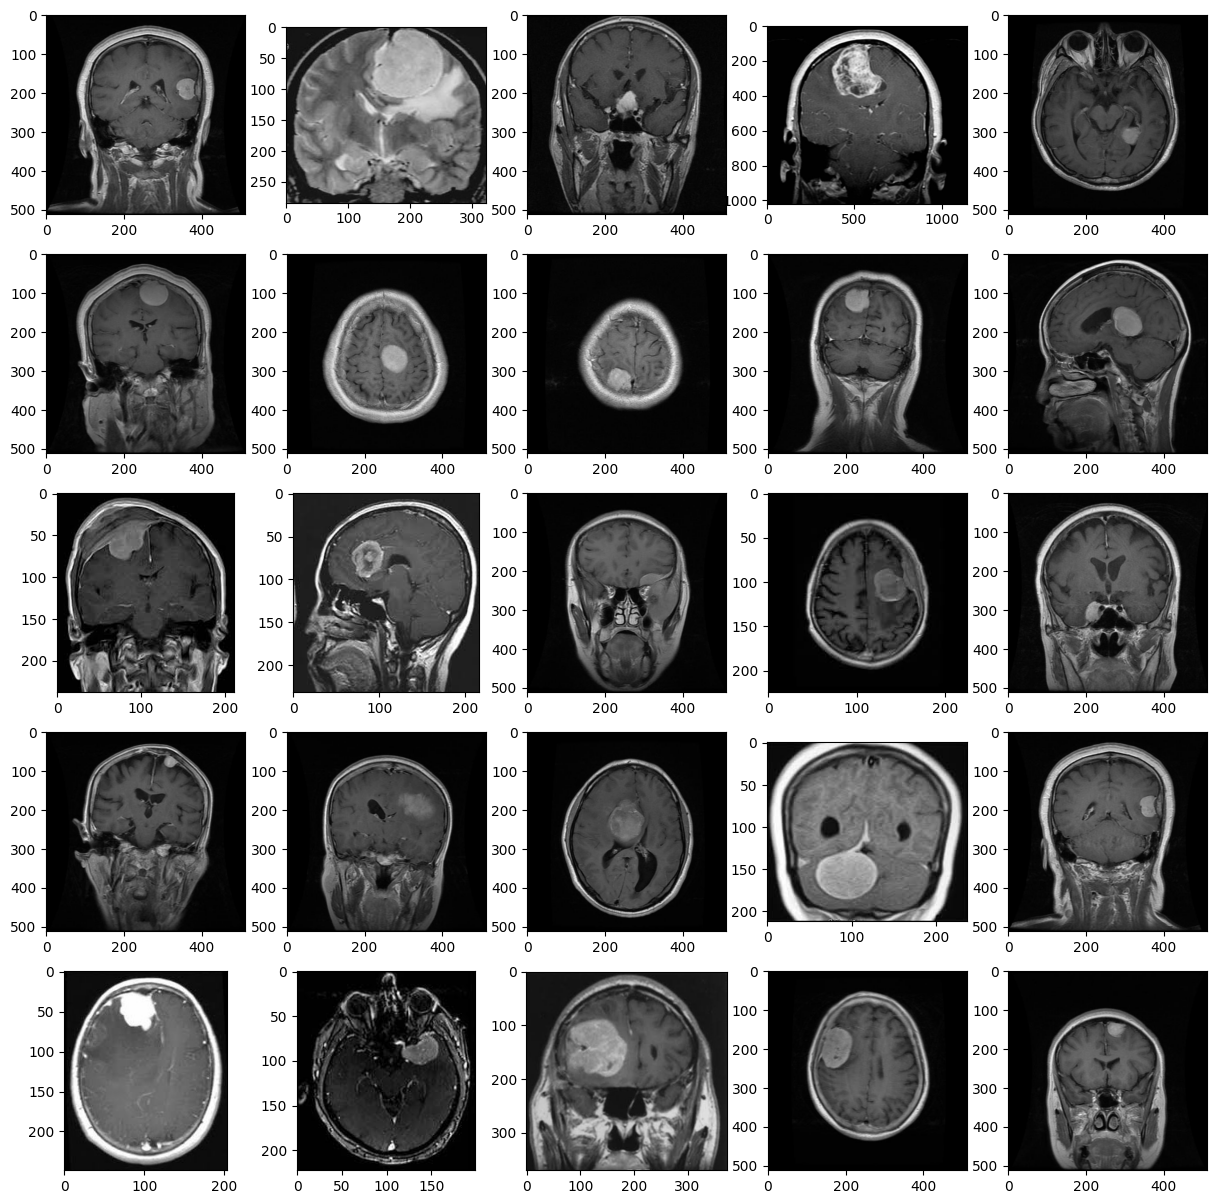

In [ ]:
#Mostrar algunas imagenes con pyplot, en este caso: 'Meningiomas'

plt.figure(figsize=(15,15))
images = os.listdir(meningioma_dir)

for i, nameimg in enumerate(images[:25]):
  plt.subplot(5,5,i+1)
  image = mpimg.imread(meningioma_dir + '/' + nameimg)
  plt.imshow(image)

In [ ]:
# Unir todas las imagenes de "ds" en un arreglo numpy

images = np.concatenate([images for images, labels in ds], axis=0)

# Ver "images"
print(images)

[[[[10.         10.         10.        ]
   [11.         11.         11.        ]
   [10.825      10.825      10.825     ]
   ...
   [ 8.          8.          8.        ]
   [ 9.095001    9.095001    9.095001  ]
   [10.         10.         10.        ]]

  [[10.         10.         10.        ]
   [11.         11.         11.        ]
   [10.825      10.825      10.825     ]
   ...
   [ 8.          8.          8.        ]
   [ 9.095001    9.095001    9.095001  ]
   [10.         10.         10.        ]]

  [[10.         10.         10.        ]
   [11.         11.         11.        ]
   [10.825      10.825      10.825     ]
   ...
   [ 8.          8.          8.        ]
   [ 9.095001    9.095001    9.095001  ]
   [10.         10.         10.        ]]

  ...

  [[ 9.635       9.635       9.635     ]
   [10.         10.         10.        ]
   [11.         11.         11.        ]
   ...
   [10.         10.         10.        ]
   [10.         10.         10.        ]
   [10.         

In [ ]:
# Unir todas los labels de "ds" en un arreglo numpy
labels = np.concatenate([labels for images, labels in ds], axis=0)

# Ver "labels"
print(labels)

[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


In [ ]:
# Ver "imagenes"
print(images.shape)

# Convertir la matriz de píxeles en un vector unidimensional
images = images.reshape(images.shape[0], -1)

# Ver "imagenes"
print(images.shape)

(5712, 100, 100, 3)
(5712, 30000)


In [ ]:
# Ver "labels"
print(labels.shape)

# Convertir la matriz de píxeles en un vector unidimensional
labels = np.argmax(labels, axis=1)

# Ver "labels"
print(labels.shape)

(5712, 4)
(5712,)


In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [ ]:
# Vamos a crear un diccionario con los parametros que vamos a ocupar para el modelo
parametros = { 'kernel': ['rbf'], 'C': [1, 10, 100], 'gamma': ['scale'], 'probability': [False]}

# Creamos el modelo utilizando un kernel = "rbf"
modelo = GridSearchCV(SVC(), param_grid = parametros)
modelo.fit(X_train, y_train)

#Hacemos la prediccion
y_pred = modelo.predict(X_test)

#Resultados de la prediccion
print("La precisión del modelo es: ", modelo.best_score_)
print("La mejor parametrización es de: ", modelo.best_params_)
print("Reporte de Clasificación:\n\n", classification_report(y_test,y_pred))

In [ ]:
# Normalización de las características
scaler = StandardScaler()

# Ajustar y transformar los datos de entrenamiento utilizando StandardScaler
X_train_scaled = scaler.fit_transform(X_train)

# Ajustar y transformar los datos de prueba utilizando StandardScaler
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Crear y entrenar el modelo SVM

#parametros = { 'kernel': ['rbf'], 'C': [1, 10, 100], 'gamma': ['scale'], 'probability': [False]}
svm_model = SVC(kernel = 'rbf', C=100, gamma='scale', probability=False)
svm_model.fit(X_train, y_train)

SVC(C=100)

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = svm_model.predict(X_test)

In [ ]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print('Precisión del modelo SVM:', accuracy)

Precisión del modelo SVM: 0.2388451443569554
